### Укажите пакеты

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.decomposition import *
from pprint import pprint
from sklearn.preprocessing import *
from sklearn.neighbors import *
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.metrics import *
from sklearn.tree import *
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer



**Загрузим данные и сделаем задачу бинарной классификации**

In [2]:
X_tr = pd.read_csv('train.csv')
y_tr = pd.read_csv('train_Y.csv')

In [3]:
# обязательное наименование контейнера `pipe` 
# предсказание на полном объеме данных X_t

In [4]:
X_tr.head(5)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,13,2017,June,23,6,0,1,1,0.0,...,No Deposit,NaN,534.0,0,Transient-Party,90.00,0,0,Check-Out,2017-06-07
1,City Hotel,100,2015,October,42,16,0,1,2,0.0,...,Non Refund,6.0,NaN,0,Transient,108.00,0,0,Canceled,2015-09-28
2,City Hotel,0,2015,October,43,20,0,1,2,0.0,...,No Deposit,3.0,NaN,0,Transient,97.00,0,0,Canceled,2015-10-20
3,Resort Hotel,125,2017,April,14,3,2,5,2,0.0,...,No Deposit,40.0,NaN,0,Contract,40.95,0,1,Check-Out,2017-04-10
4,City Hotel,104,2017,June,24,11,2,3,2,0.0,...,No Deposit,28.0,NaN,0,Transient,112.50,0,0,Check-Out,2017-06-16


In [5]:
y_tr.head(5)

,is_canceled
0,0
1,1
2,1
3,0
4,0


In [6]:
cancels_num = len(y_tr[y_tr['is_canceled']==1])
print("Cancelation rate= ", cancels_num/len(y_tr))

X_tr['reservation_status'].value_counts(normalize=True)*100

Cancelation rate=  0.3704224880222468


Check-Out    62.957751
Canceled     36.003618
No-Show       1.038630
Name: reservation_status, dtype: float64

In [7]:
df = pd.concat([y_tr, X_tr], axis = 1)

In [8]:
df.head()

,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,13,2017,June,23,6,0,1,1,...,No Deposit,NaN,534.0,0,Transient-Party,90.00,0,0,Check-Out,2017-06-07
1,1,City Hotel,100,2015,October,42,16,0,1,2,...,Non Refund,6.0,NaN,0,Transient,108.00,0,0,Canceled,2015-09-28
2,1,City Hotel,0,2015,October,43,20,0,1,2,...,No Deposit,3.0,NaN,0,Transient,97.00,0,0,Canceled,2015-10-20
3,0,Resort Hotel,125,2017,April,14,3,2,5,2,...,No Deposit,40.0,NaN,0,Contract,40.95,0,1,Check-Out,2017-04-10
4,0,City Hotel,104,2017,June,24,11,2,3,2,...,No Deposit,28.0,NaN,0,Transient,112.50,0,0,Check-Out,2017-06-16


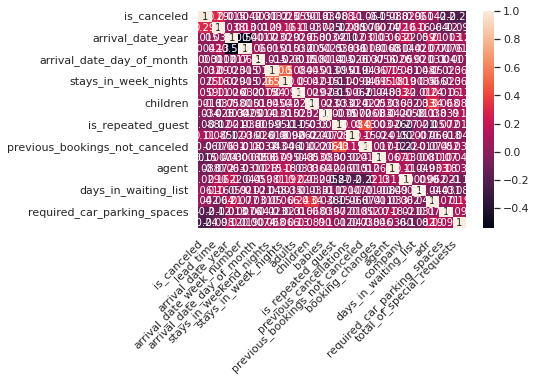

In [9]:
df_corr = df.corr()

sns.set(rc={'figure.figsize':(30, 30)})
ax = sns.heatmap(df_corr, annot = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,29847.000000,29847.000000,29847.000000,29847.000000,29847.000000,29847.000000,29847.000000,29847.000000,29846.000000,29847.000000,29847.000000,29847.000000,29847.000000,29847.000000,25708.000000,1709.000000,29847.000000,29847.000000,29847.000000,29847.000000
mean,0.370422,104.595068,2016.160351,27.087915,15.881596,0.930043,2.498576,1.855731,0.104168,0.007806,0.032365,0.086005,0.142929,0.222133,86.940991,190.709187,2.194391,101.485769,0.062385,0.570242
std,0.482926,107.511872,0.708469,13.608890,8.776487,0.995634,1.908162,0.579497,0.403583,0.089520,0.176971,0.832083,1.551008,0.655731,111.386547,132.797932,16.665771,48.134758,0.242411,0.790246
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,68.610000,0.000000,0.000000
50%,0.000000,70.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,183.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,14.000000,34.000000,50.000000,10.000000,2.000000,1.000000,26.000000,68.000000,14.000000,531.000000,543.000000,391.000000,510.000000,2.000000,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29847 entries, 0 to 29846
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     29847 non-null  int64  
 1   hotel                           29847 non-null  object 
 2   lead_time                       29847 non-null  int64  
 3   arrival_date_year               29847 non-null  int64  
 4   arrival_date_month              29847 non-null  object 
 5   arrival_date_week_number        29847 non-null  int64  
 6   arrival_date_day_of_month       29847 non-null  int64  
 7   stays_in_weekend_nights         29847 non-null  int64  
 8   stays_in_week_nights            29847 non-null  int64  
 9   adults                          29847 non-null  int64  
 10  children                        29846 non-null  float64
 11  babies                          29847 non-null  int64  
 12  meal                            

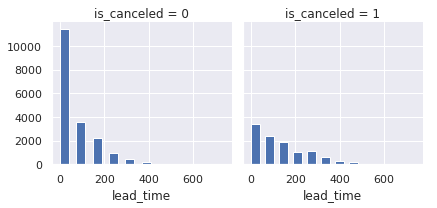

In [12]:
lead_time_plot = sns.FacetGrid(df, col = 'is_canceled')
lead_time_plot.map(plt.hist, 'lead_time', width=40)
lead_time_plot.add_legend()

plt.show()

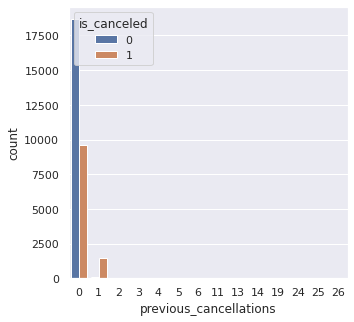

In [13]:
sns.set(rc={'figure.figsize':(5, 5)})
sns.countplot(data = df, x = 'previous_cancellations', hue = 'is_canceled')
plt.show()

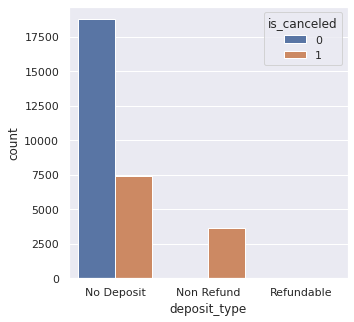

In [14]:
sns.countplot(x = 'deposit_type', hue = 'is_canceled',data=df);

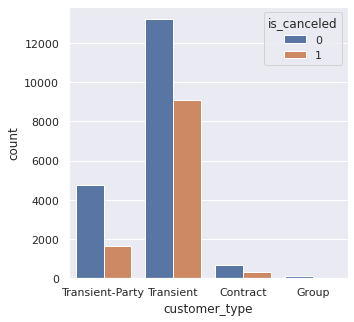

In [15]:
sns.countplot(data = df, x = 'customer_type', hue = 'is_canceled')
plt.show()

In [16]:
room_conflict = df.loc[df['reserved_room_type'] != df['assigned_room_type']]
room_conflict['is_canceled'].value_counts(normalize=True)*100

0    94.58445
1     5.41555
Name: is_canceled, dtype: float64

In [17]:
df.isna().sum()

is_canceled                           0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              1
babies                                0
meal                                  0
country                             124
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              4139
company                           28138


In [18]:
df.head(1)


,is_canceled,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,13,2017,June,23,6,0,1,1,...,No Deposit,NaN,534.0,0,Transient-Party,90.0,0,0,Check-Out,2017-06-07


In [19]:
df = df.drop('reservation_status_date', axis=1)

In [20]:
for col in df.columns:
    print(col, '  ', df[col].unique())
    print('\n')
    
#Не нравится!
#meal undefined

is_canceled    [0 1]


hotel    ['Resort Hotel' 'City Hotel']


lead_time    [ 13 100   0 125 104  17  14 147 115  22  78   7 203  50  81 275 140 161
   4  85   6  87  32 254   2 105  68  82  41  38 314  79 246 226  95 127
 142  76  60  52 204 170 233 139 178   9 151 358  18  26  15  42  71  12
  10 160 109 188 255  47 279  75  61  56   5 111   8  64  99  92  46  83
 258  19  11   1  65   3  39 195 171  67 179 153 172  28  31  45  58 124
  96  66 135 257 207 116  84  16  36 158 191 342  57 181 148  48 136 230
  51 102 131 130  40 201 119 123 206 134 320  59 280 192  53 395 329 187
  33 166 219  97 468 145  69  93  20 336 302 276 305 156 283  43 253 389
  23  30 183  70 348 419  80 295 418 202 250 106 335 163 121 143 277  29
  98 222 144 126 420  25  90 256  49 103 225 410  27 117 251  77 396 122
 377 339 274 185 173  72 108 386  54 165 110  24  73 475 423 101  88 194
 210 388  55 182  91 164 433 176 118 261  21 457 503  44  37 243 184 594
 128 462 308  35 112  86 129 186 167 159 168 21

In [21]:
real_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=[object])

imp_mean = SimpleImputer(strategy='mean')
df_imp_mean = imp_mean.fit_transform(real_features)

imp_freq = SimpleImputer(strategy='most_frequent')
df_imp_freq = imp_freq.fit_transform(categorical_features)

df_imp_meanDF = pd.DataFrame(df_imp_mean, columns = real_features.columns)
df_imp_freqDF = pd.DataFrame(df_imp_freq, columns = categorical_features.columns)

data = pd.concat([df_imp_meanDF, df_imp_freqDF], axis = 1)

data.head(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,0.0,13.0,2017.0,23.0,6.0,0.0,1.0,1.0,0.0,0.0,...,June,BB,PRT,Corporate,Corporate,A,A,No Deposit,Transient-Party,Check-Out
1,1.0,100.0,2015.0,42.0,16.0,0.0,1.0,2.0,0.0,0.0,...,October,HB,PRT,Offline TA/TO,TA/TO,A,A,Non Refund,Transient,Canceled
2,1.0,0.0,2015.0,43.0,20.0,0.0,1.0,2.0,0.0,0.0,...,October,BB,PRT,Offline TA/TO,TA/TO,D,F,No Deposit,Transient,Canceled
3,0.0,125.0,2017.0,14.0,3.0,2.0,5.0,2.0,0.0,0.0,...,April,BB,GBR,Offline TA/TO,TA/TO,A,A,No Deposit,Contract,Check-Out
4,0.0,104.0,2017.0,24.0,11.0,2.0,3.0,2.0,0.0,0.0,...,June,BB,PRT,Offline TA/TO,TA/TO,E,E,No Deposit,Transient,Check-Out


In [22]:

onehot = OneHotEncoder(handle_unknown = 'ignore')
onehot.fit(data[categorical_features])

x_train = pd.concat([pd.DataFrame(onehot.transform(x_train[categorical_features]).toarray()), x_train], axis=1)
x_test = pd.concat([pd.DataFrame(onehot.transform(x_test[categorical_features]).toarray()), x_test], axis=1)

ValueError: Boolean array expected for the condition, not object

In [ ]:
X = data.drop(['is_canceled'], axis=1)
Y = data['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 42)

In [ ]:
#Конец
X_ts = pd.read_csv('test.csv')
y_predict = pipe.predict(X_ts)